# Exercise1

## <span style="color:blue"> Part 2 </span>

### read data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_X_test = pd.read_csv('housing_X_test.csv',header=None)
df_X_train = pd.read_csv('housing_X_train.csv',header=None)
df_y_test = pd.read_csv('housing_y_test.csv',header=None)
df_y_train = pd.read_csv('housing_y_train.csv',header=None)

In [3]:
X_test = df_X_test.values.transpose()
X_train = df_X_train.values.transpose()
y_test = df_y_test.values
y_train = df_y_train.values

### error and loss

$$\min_{\mathbf{w}\in R^d, b\in R} ~ \overbrace{\underbrace{\tfrac{1}{2n} \|X \mathbf{w}+ b\mathbf{1} - \mathbf{y}\|_2^2}_{\mbox{error}} + \lambda \|\mathbf{w}\|_2^2}^{\mbox{loss}}$$

In [4]:
def error(X, y, w, b, lamb):
    n = len(X) 
    ones= np.ones((n, 1))
    temp = X.dot(w) + b * ones - y
    norm = np.linalg.norm(temp)
    error = (1 / (2 * n)) * (norm ** 2)
    return error

In [5]:
def loss(X, y, w, b, lamb):
    err = error(X, y, w, b, lamb)
    temp = lamb * (np.linalg.norm(w) ** 2)
    return err + temp

### gradient descent for ridge regression

$$\frac{\partial}{\partial\mathbf{w}} = \tfrac1n X^\top (X\mathbf{w} + b\mathbf{1} - \mathbf{y}) + 2 \lambda \mathbf{w}$$

In [6]:
# returen gradient of w: R^d
def gradient_w(X,y,w,b, lamb):
    n = len(X) 
    ones= np.ones((n, 1))
    temp = X.dot(w) + b * ones - y
    return 1 / n * np.transpose(X).dot(temp) + 2 * lamb * w 

$$\frac{\partial}{\partial b} = \tfrac1n \mathbf{1}^\top (X\mathbf{w} + b\mathbf{1} - \mathbf{y})$$

In [7]:
# return gradient of b:R
def gradient_b(X,y,w,b,lamb):
    n = len(X) 
    ones = np.ones((n, 1))
    temp = X.dot(w) + b * ones - y
    return (1 / n *  np.transpose(ones).dot(temp))

In [8]:
# return  w, b, loss & error
def gradient_ridge_regression(X_train, y_train, w0, b0, max_pass, step_size, tol, lamb):
    prev_w = w0
    curr_w = w0
    prev_b= b0
    curr_b = b0
    train_error_lst = []
    train_loss_lst = []
    test_error_lst = []
    for t in range(1, max_pass+1):
        # calculate gradient
        gradient_prev_w = gradient_w(X_train,y_train,prev_w,prev_b, lamb)
        gradient_prev_b = gradient_b(X_train,y_train,prev_w,prev_b, lamb)
        # calculate w & b
        curr_w = prev_w - step_size * gradient_prev_w
        curr_b = prev_b - step_size * gradient_prev_b
        # calculate error and loss
        curr_train_error = error(X_train, y_train, curr_w, curr_b, lamb)
        curr_train_loss= loss(X_train, y_train, curr_w, curr_b, lamb)
        curr_test_error = error(X_test, y_test, curr_w, curr_b, lamb)
        
        train_error_lst.append(curr_train_error)
        train_loss_lst.append(curr_train_loss)
        test_error_lst.append(curr_test_error)
        
        if np.linalg.norm(curr_w - prev_w) <= tol:
            break
        
        prev_w = curr_w
        prev_b = curr_b
    
    return curr_w, curr_b, train_error_lst, train_loss_lst, test_error_lst
        

### $\lambda$ = 0

In [9]:
# some inputs
d = len(X_train[0])
w0 = np.zeros((d,1))
max_pass = 2000
tol = 0.00000001
step_size = 0.00000001

In [10]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression(X_train, y_train, w0, 0, max_pass, step_size, tol, 0)

In [11]:
b_train

array([[0.00010801]])

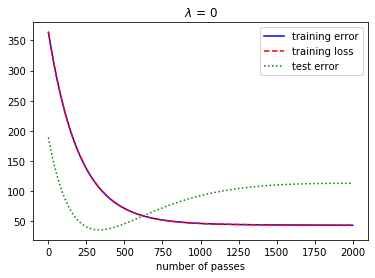

In [12]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
passes = list(range(1,max_pass+1))

plt.plot(passes, train_error, '-b', label='training error')
plt.plot(passes, train_loss, '--r', label='training loss')
plt.plot(passes, test_error, ':g', label='test error')
plt.legend(loc = 'upper right')
plt.xlabel("number of passes")
plt.title('$\lambda$ = 0')
plt.show()

### $\lambda$ = 10

In [13]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression(X_train, y_train, w0, 0, max_pass, step_size, tol, 10)

In [14]:
b_train

array([[0.00010803]])

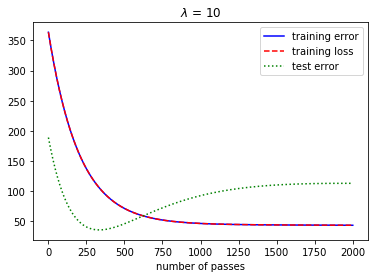

In [15]:
#%matplotlib notebook
plt.plot(passes, train_error, '-b', label='training error')
plt.plot(passes, train_loss, '--r', label='training loss')
plt.plot(passes, test_error, ':g', label='test error')
plt.legend(loc = 'upper right')
plt.xlabel("number of passes")
plt.title('$\lambda$ = 10')
plt.show()

## <span style="color:blue"> Part 3 </span>

### re-implenmentations of gradient descent for ridge regression

Given w, directly compute b by setting $\frac{\partial}{\partial b} = \tfrac1n \mathbf{1}^\top (X\mathbf{w} + b\mathbf{1} - \mathbf{y}) = 0$.

The solution is: $b = \frac{<\mathbf{1} , \mathbf{y}-X \mathbf{w}>}{\|\mathbf{1}\|_2^2} = \frac{\mathbf{1}^\top (\mathbf{y}-X \mathbf{w})}{\|\mathbf{1}\|_2^2}$

In [16]:
# return b
def closed_form_b(X,y,w):
    n = len(X)
    ones = np.ones((n, 1))
    temp = y - X.dot(w)
    #print(temp)
    #print(len(temp))
    #print(len(ones))
    return np.transpose(ones).dot(y - X.dot(w)) / (np.linalg.norm(ones) ** 2)
    #return 10

In [17]:
# return  w, b, loss & error
def gradient_ridge_regression2(X_train, y_train, w0, b0, max_pass, step_size, tol, lamb):
    prev_w = w0
    curr_w = w0
    prev_b= b0
    curr_b = b0
    train_error_lst = []
    train_loss_lst = []
    test_error_lst = []
        
    for t in range(1, max_pass+1):
        # calculate gradient
        gradient_prev_w = gradient_w(X_train,y_train,prev_w,prev_b, lamb)
        gradient_prev_b = gradient_b(X_train,y_train,prev_w,prev_b, lamb)
        # calculate w & b
        curr_w = prev_w - step_size * gradient_prev_w
        curr_b = closed_form_b(X_train, y_train, curr_w) # ONLY CHANGE HERE #
        # calculate error and loss
        curr_train_error = error(X_train, y_train, curr_w, curr_b, lamb)
        curr_train_loss= loss(X_train, y_train, curr_w, curr_b, lamb)
        curr_test_error = error(X_test, y_test, curr_w, curr_b, lamb)
        
        train_error_lst.append(curr_train_error)
        train_loss_lst.append(curr_train_loss)
        test_error_lst.append(curr_test_error)
        
        if np.linalg.norm(curr_w - prev_w) <= tol:
            break
        
        prev_w = curr_w
        prev_b = curr_b
    
    return curr_w, curr_b, train_error_lst, train_loss_lst, test_error_lst
        

### $\lambda$ = 0

In [18]:
# some inputs
d = len(X_train[0])
w0 = np.zeros((d,1))
max_pass = 100000
tol = 0.00000001
step_size = 0.00000001

In [19]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression2(X_train, y_train, w0, 0, max_pass, step_size, tol, 0)

In [20]:
b_train

array([[28.40459866]])

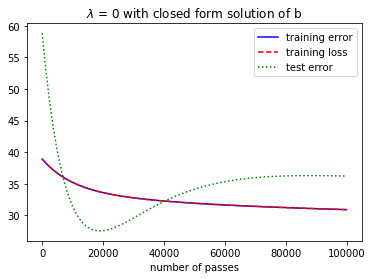

In [21]:
passes = list(range(1,max_pass+1))

plt.plot(passes, train_error, '-b', label='training error')
plt.plot(passes, train_loss, '--r', label='training loss')
plt.plot(passes, test_error, ':g', label='test error')
plt.legend(loc = 'upper right')
plt.xlabel("number of passes")
plt.title('$\lambda$ = 0 with closed form solution of b')
plt.show()

### $\lambda$ = 10

In [22]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression2(X_train, y_train, w0, 0, max_pass, step_size, tol, 10)

In [23]:
b_train

array([[28.41121877]])

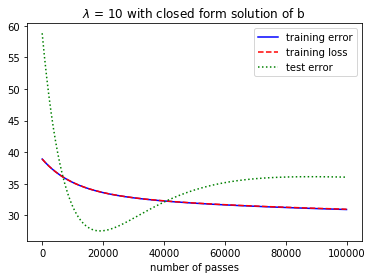

In [24]:
plt.plot(passes, train_error, '-b', label='training error')
plt.plot(passes, train_loss, '--r', label='training loss')
plt.plot(passes, test_error, ':g', label='test error')
plt.legend(loc = 'upper right')
plt.xlabel("number of passes")
plt.title('$\lambda$ = 10 with closed form solution of b')
plt.show()

## <span style="color:blue"> Part 4 </span>

Center the data before running the algorithm

In [25]:
def center_X(X):
    mean = np.mean(X, axis = 0)
    n = len(X)
    for i in range(n):
        curr = X[i]
        for j in range(len(curr)):
            X[i][j] -= mean[j]
    return X

In [26]:
def center_y(y):
    mean = np.mean(y)
    #print(mean)
    n = len(y)
    for i in range(n):
        y[i][0] -= mean
    return y

In [27]:
centered_X_train = center_X(X_train)
centered_y_train = center_y(y_train)
centered_X_test = center_X(X_test)
centered_y_test = center_y(y_test)

### $\lambda$ = 0

In [28]:
# some inputs
d = len(X_train[0])
w0 = np.zeros((d,1))
max_pass = 100000
tol = 0.00000001
step_size = 0.0000001

In [29]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression2(X_train, y_train, w0, 0, max_pass, step_size, tol, 0)

In [30]:
b_train

array([[1.63703473e-15]])

### $\lambda$ = 10

In [31]:
w_train, b_train, train_error, train_loss, test_error = gradient_ridge_regression2(X_train, y_train, w0, 0, max_pass, step_size, tol, 10)

In [32]:
b_train

array([[1.38741596e-15]])

In both cases, b is close to 0. So b = 0 is the optimum solution.